# Librerías

In [273]:
# packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.filterwarnings("ignore")

# Lectura de datos

In [27]:
# read data
df = pd.read_csv('challenge/dataset_SCL.csv', sep = ',')

# transform to datetime format
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

# sample of data
df.head()

/var/folders/nz/9mbks9xs2hv0lybrdkjrk2rh0000gn/T/ipykernel_95041/2466737034.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('challenge/dataset_SCL.csv', sep = ',')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# 1. ¿How is the data distributed? 

In [32]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} features!')

The dataset contains 68206 rows and 18 features!


In [31]:
df['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

The dataset contains only departures from Santiago, not arrivals. Let´s see how those departures are distributed

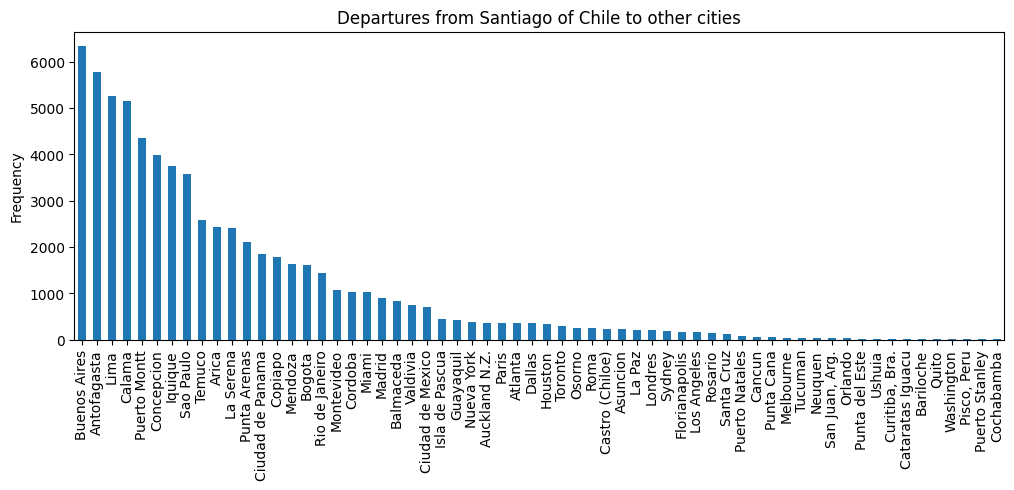

In [38]:
plt.figure(figsize = (12, 4))
df['SIGLADES'].value_counts().plot.bar()
plt.title('Departures from Santiago of Chile to other cities')
plt.ylabel('Frequency')
plt.show()

Apparently, the departures from Santiago are concentrated on destinations within `South America`. On that regard, it is noted that the majority of flights are local, with some expectable exceptions like departures to `Buenos Aires` or `Lima`.

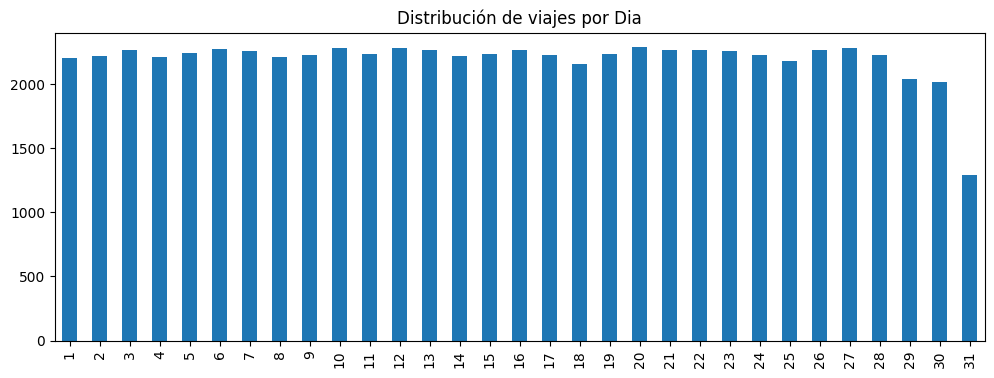

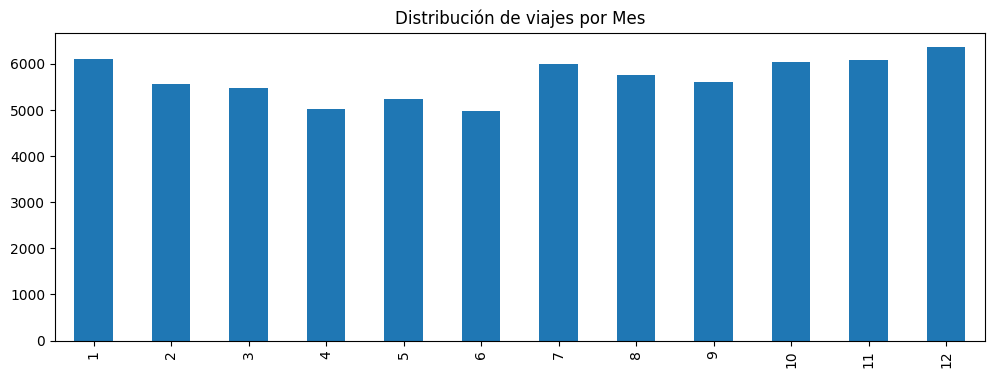

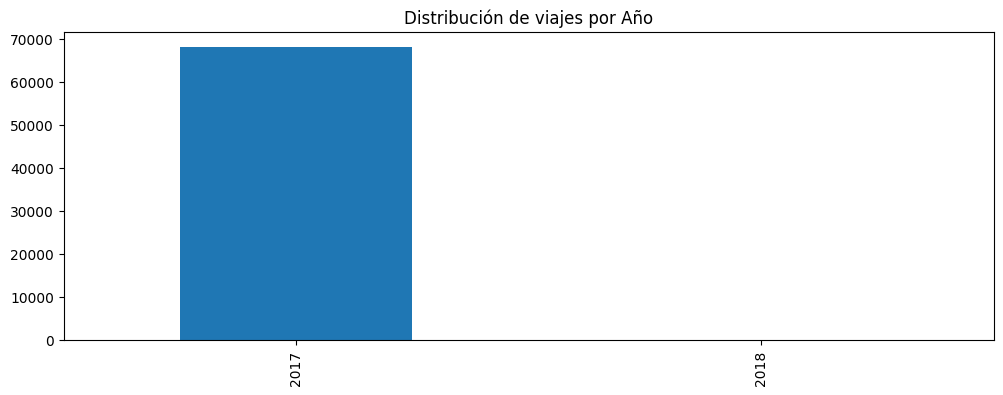

In [60]:
for feature in ['DIA', 'MES', 'AÑO']:
    plt.figure(figsize = (12, 4))
    df[feature].value_counts().sort_index().plot.bar()
    plt.title(f'Distribución de viajes por {feature.title()}')
    plt.show()


Del gráfico anterior, se observa:

- La cantidad de viajes por `DIA` se distribuye de manera relativamente homógenea, con una moderada disminución en los últimos días del mes. Esto puede ser explicado en que los últimos días del mes (29, 30 y 31) no están presentes en todos los meses del año.
- La cantidad de viajes por `MES` se distribuye con leves diferencias entre cada mes, siendo los meses con mayor cantidad de vuelos Diciembre, Enero y Julio.
- La cantidad de viajes por `AÑO` es casi en la totalidad orientada hacia el año 2017, donde tan solo 2 viajes de los 68.206 viajes en el dataset son del año 2018.

In [73]:
df['año_mes'] = df.apply(lambda x: str(x['AÑO']) + '_' + str(x['MES']), axis = 1)
df.groupby('año_mes').count()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
año_mes,,,,,,,,,,,,,,,,,,
2017_1,6106,6106,6106,6106,6106,6106,6105,6106,6106,6106,6106,6106,6106,6106,6106,6106,6106,6106
2017_10,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032,6032
2017_11,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080
2017_12,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356,6356
2017_2,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561,5561
2017_3,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482
2017_4,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020
2017_5,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240
2017_6,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981


# 2. Generate new features

In [283]:
# we define date variables
dec_15 = datetime.date(2017, 12, 15) # Dec-15 2017
mar_3 = datetime.date(2017, 3, 3) # Mar-3 2017
jul_15 = datetime.date(2017, 7, 15) # Jul-15 2017
jul_31 = datetime.date(2017, 7, 31) # Jul-31 2017
sep_11 = datetime.date(2017, 9, 11) # Sep-11 2017
sep_30 = datetime.date(2017, 9, 30) # Sep-30 2017
mar_3_2018 = datetime.date(2018, 3, 3) # Mar-3 2018

# and time variables
am_5 = datetime.time(5, 0) # 5:00 am
am_11 = datetime.time(11, 59) # 11:59 am
pm_12 = datetime.time(12, 0) # 12:00 pm
pm_18 = datetime.time(18, 59) # 18:59 pm
pm_19 = datetime.time(19, 0) # 19:00 pm
am_4 = datetime.time(4, 59) # 4:59 am


df['high_season'] = df['Fecha-I'].apply(lambda x: 1 if (x.date() >= dec_15 or x.date() <= mar_3) 
                                        | (x.date() >= jul_15 and x.date() <= jul_31) 
                                        | (x.date() >= sep_11 and x.date() <= sep_30) 
                                        | (x.year == 2018 and x.date() <= mar_3_2018) # border case from 2 obs belonging to 2018
                                        else 0) 
df['min_diff'] = df.apply(lambda x: (x['Fecha-O'] - x['Fecha-I']).total_seconds() / 60, axis = 1)
df['delay_15'] = np.where(df['min_diff'] > 15, 1, 0)
df['period_day'] = df['Fecha-I'].apply(lambda x: 'morning' if (x.time() >= am_5 and x.time() <= am_11) else 
                                       'afternoon' if (x.time() >= pm_12 and x.time() <= pm_18) else
                                       'night' if (x.time() >= pm_19 or x.time() <= am_4)
                                       else np.nan)


new_features = ['high_season', 'min_diff', 'delay_15', 'period_day']
df[['Fecha-I', 'Fecha-O'] + new_features].to_csv('synthetic_features.csv', sep = ';', encoding = 'utf-8-sig', index = False)



# 3. Behavior of delay rate across features

In [315]:
df['TIPOVUELO'] = df['TIPOVUELO'].apply(lambda x: 'National' if x == 'N' else 'International' if x == 'I' else x)

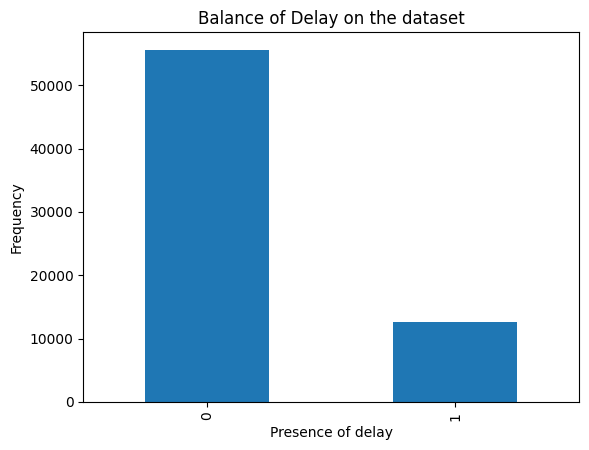

In [327]:
df['delay_15'].value_counts().plot.bar()
plt.title('Balance of Delay on the dataset')
plt.xlabel('Presence of delay')
plt.ylabel('Frequency')
plt.show()

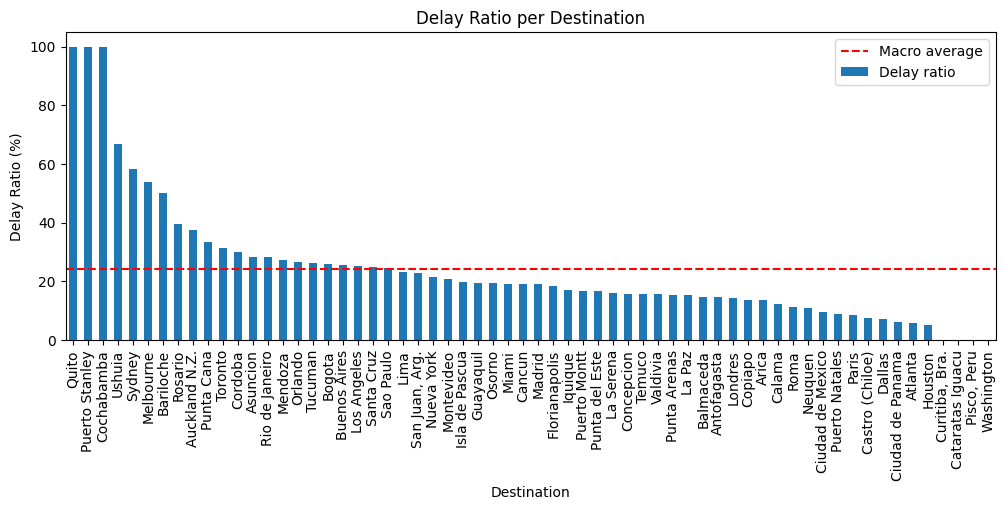

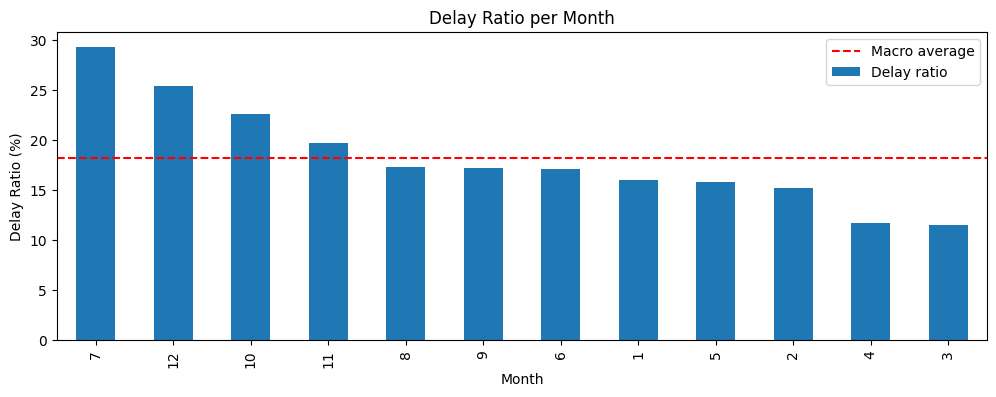

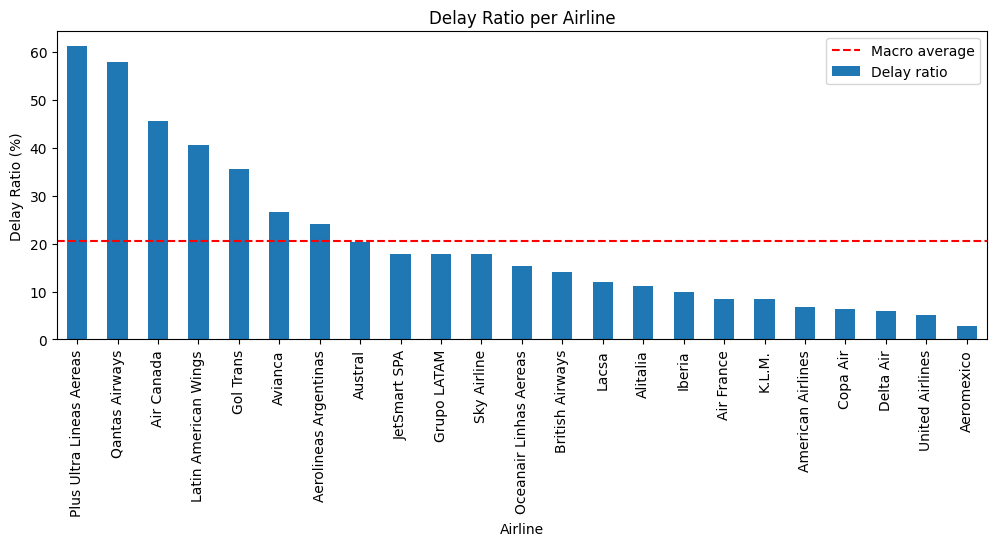

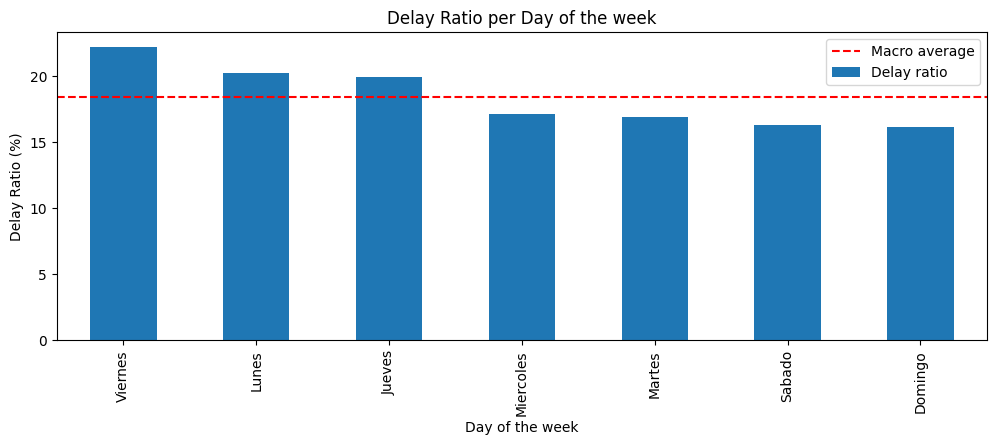

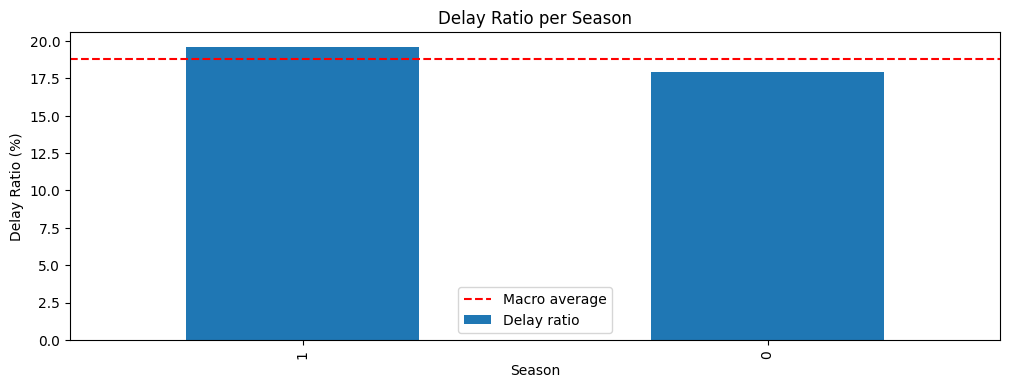

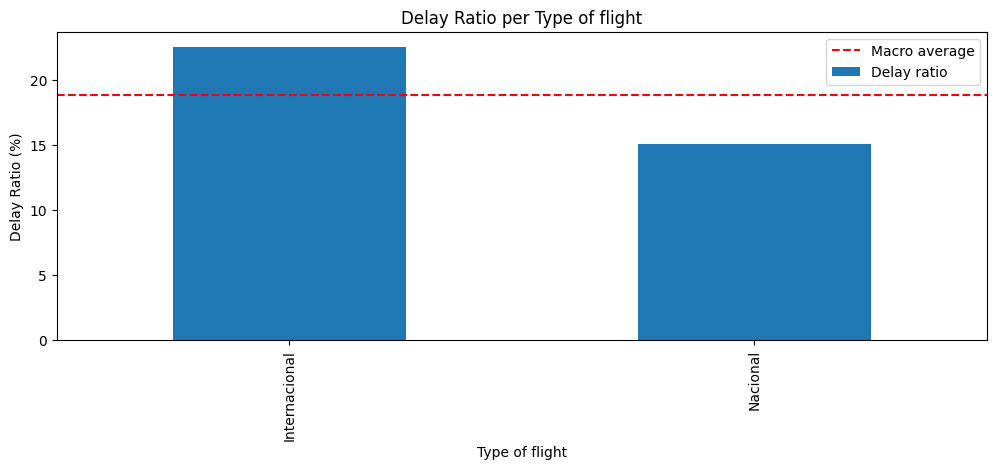

In [316]:
def plot_ratio(feature, title, xlabel):
    plt.figure(figsize = (12, 4))
    (df.groupby(feature).mean()['delay_15'].sort_values(ascending = False) * 100).plot(kind = 'bar', label = 'Delay ratio')
    plt.axhline(df.groupby(feature).mean()['delay_15'].mean()*100, color = 'r', label = 'Macro average', linestyle = '--')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Delay Ratio (%)')
    plt.legend()

plot_ratio(feature = 'SIGLADES', title = 'Delay Ratio per Destination', xlabel = 'Destination')
plot_ratio(feature = 'MES', title = 'Delay Ratio per Month', xlabel = 'Month')
plot_ratio(feature = 'OPERA', title = 'Delay Ratio per Airline', xlabel = 'Airline')
plot_ratio(feature = 'DIANOM', title = 'Delay Ratio per Day of the week', xlabel = 'Day of the week')
plot_ratio(feature = 'high_season', title = 'Delay Ratio per Season', xlabel = 'Season')
plot_ratio(feature = 'TIPOVUELO', title = 'Delay Ratio per Type of flight', xlabel = 'Type of flight')

# 4. Likelihood of delay

In [317]:
target = 'delay_15'
y = df[target]
X = df.drop(columns = target)

In [320]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)


